### IDs:
Insert yours IDs to the cell below

ID #1:329827190

ID #2:204818181


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [189]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats 

### Question 1 - Data viz - practical

Load Boston dataset from sklearn
1. Produce a histogram of the apartments’ price. 
2. Produce a box plot of the apartments’ price. 
3. Produce a correlation matrix of all the features.
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JoinPlot)
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

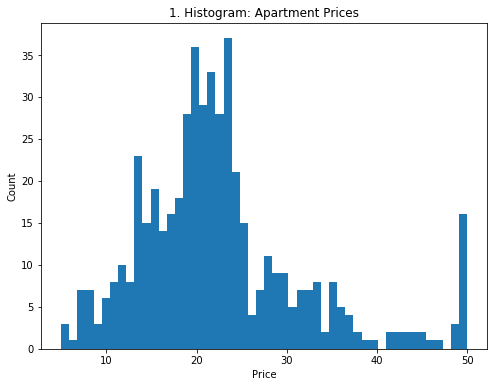

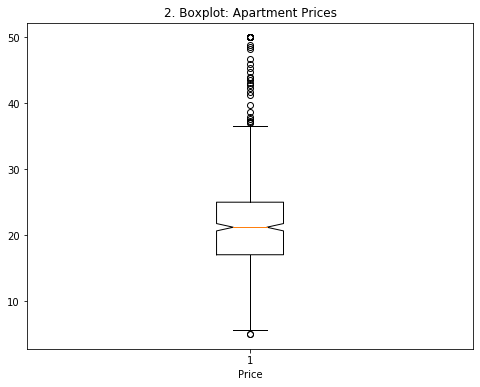

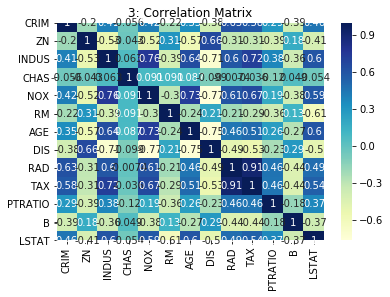

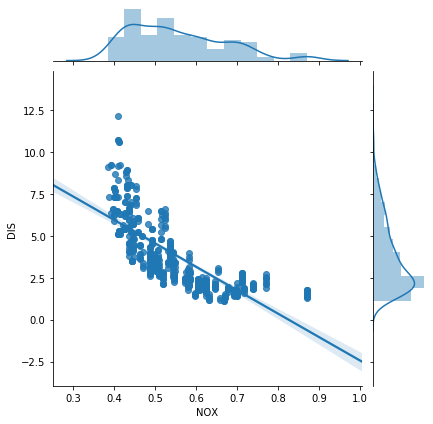

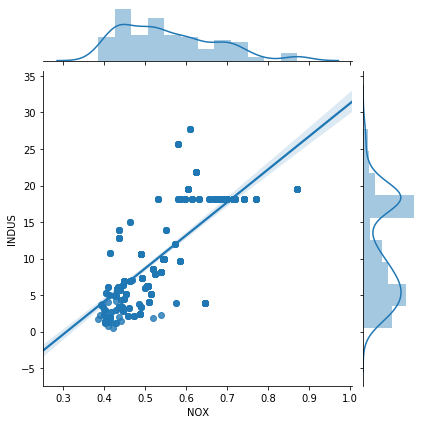

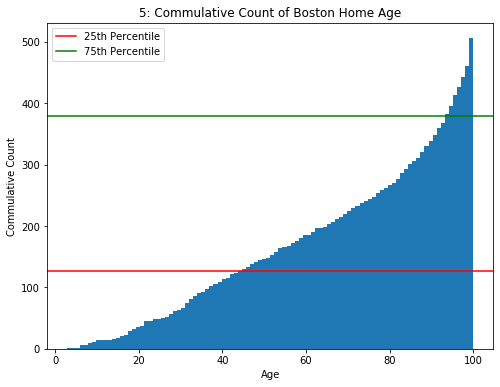

In [184]:
boston = load_boston()

#1
plt.figure(figsize=(8, 6))
plt.hist(boston.target, bins=50)
plt.title("1. Histogram: Apartment Prices")
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


#2
plt.figure(figsize=(8, 6))
plt.title("2. Boxplot: Apartment Prices")
plt.boxplot(x = boston.target, notch = True);
plt.xlabel('Price')
plt.show()

#3
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sns.heatmap(boston_df.corr(), cmap="YlGnBu", annot=True).set_title("3: Correlation Matrix")

#4
sns.jointplot("NOX", "DIS", boston_df, kind="reg")
sns.jointplot("NOX", "INDUS", boston_df, kind="reg")

#5
plt.figure(figsize=(8,6))
plt.hist(boston_df["AGE"],cumulative=True, bins=100)
# Define 25th range
age25 = np.percentile(boston_df['AGE'],25) 
twentyfive= np.where(boston_df['AGE'] - age25 < 0)[0]
# Define 75th range
age75 = np.percentile(boston_df['AGE'],75)
seventyfive = np.where(boston_df['AGE'] - age75 < 0)[0]
plt.axhline(twentyfive.size, label = '25th Percentile', color='r')
plt.axhline(seventyfive.size, label = '75th Percentile', color='g')
plt.title('5: Commulative Count of Boston Home Age')
plt.xlabel("Age")
plt.ylabel("Commulative Count")
plt.legend()
plt.show()


### Question 2 - Gaussian mixtures

In this question N(μ, σ2) stands for a normal distribution with mean μ and variance σ2. <br>
Fred, Mel and Sid are repair technicians who work for Randobezeq – a phone company. <br>
* Fast Fred takes time which is distributed as N(40, 16) to repair a telephone line failure at a customer’s home.
* Medium Mel takes time which is N(45, 36) for the same task.
* Slow Sid takes time which is N(50, 64) for the same task.

#### 2.A

Fred is due to arrive to repair your phone at 11AM tomorrow. How confident can you be that you will be done by 11:45? 

In [197]:
# loc = mean, scale = root of variance
confidence = stats.norm.cdf(45, loc=40, scale =4)
print('{0:.1f}%'.format(confidence*100))

89.4%


When a customer in North Randomistan orders a repair, there is a 40% chance Fred will do the work and 30% each that Mel or Sid will do the work. 

#### 2.B

What is the distribution of the duration of repair in North Randomistan?

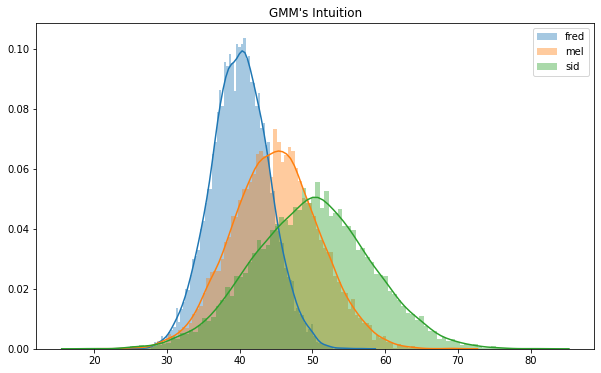

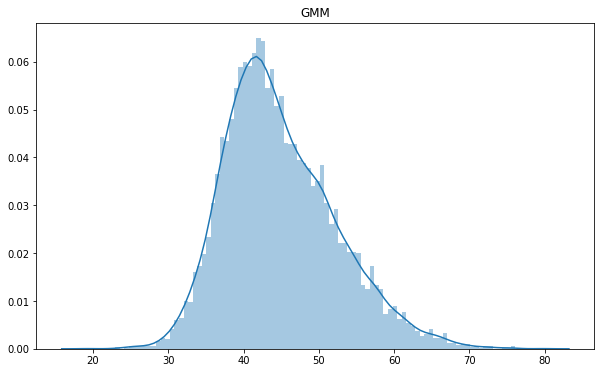

In [212]:
# Creating distributions and their weights
fred = stats.norm.rvs(loc = 40, scale = 4, size=10000)
mel = stats.norm.rvs(loc = 45, scale = 6, size=10000)
sid = stats.norm.rvs(loc = 50, scale = 8, size=10000)

mel_w = 0.33 # 33%
sid_w = 0.33  # 33%
fred_w = 0.44 # 44%

# Building the GMM
gmm_data = []
for i in range(10000):
    p = stats.uniform.rvs(size=1)
    if p < mel_w:
        gmm_data.append(np.random.choice(mel, size=1))
    elif p < sid_w + mel_w:
        gmm_data.append(np.random.choice(sid, size=1))
    else:
        gmm_data.append(np.random.choice(fred, size=1))
    
fig = plt.figure(figsize=(10, 6))
sns.distplot(fred,bins=100,label="fred")
sns.distplot(mel,bins=100, label="mel")
sns.distplot(sid,bins=100, label="sid")
plt.title("GMM's Intuition")
plt.legend()
    
fig = plt.figure(figsize=(10, 6))
sns.distplot(gmm_data, bins=100)
plt.title('GMM')
plt.show()

#### 2.C
Let Φ denote the CDF of a standard normal random variable. Use Φ to express the CDF of the duration of a repair in North Randomistan.

In [9]:
# do the cdf of that

#### 2.D

If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

### Question 3 - Gaussian mixtures – parameter estimation and generation

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD). Furthermore, assume that μ1=0 and that σ1=σ2=1.
Read the data and answer the following questions.

In [13]:
data = pd.read_excel ('GMD.xlsx')
# data

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

In [15]:
# EM
# https://www.kaggle.com/charel/learn-by-example-expectation-maximization

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

In [ ]:
# Plot 

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  μ1+3 and μ2+5 
* σ1=σ2=1
* w1=w2=0.5

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 50,000 RCU and a standard deviation of 20,000 RCU.

#### 4.A
What percent of people earn less than 40,000 RCU?

In [ ]:
#just plot

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [ ]:
#use IQR?

#### 4.C
What percent of people earn more than 70,000 RCU?

#### 4.D
The company has 1000 employees. Do you expect that there are any employees that earn more than 120,000 RCU?  

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### 5.B
Write code to compute the exact value of $V(T_{N})$

#### 5.C
Write code to exactly compute $P(T_{20}>60)$

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

### Question 6 - More on convolutions

Let n be an integer, not prime. <br>
Find two distributions a and b on the nonnegative integers, both not concentrated at 0 (this is the trivial answer…), such that the convolution of a and b is the equiprobable (uniform) distribution on the set of numbers 0, 1, 2, . . . , n-1. <br>
\* Note: If n is prime this is not possible, but the proof is not so easy. 